<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> How far will the AAPL fall from the tree </h3> </center>
<center><h4>Harris Lussenhop, Mahin Master, Gary Shetye</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

This project uses historical economic indicators to predict the closing price of the stock APPL. Predicting a stock’s price can be very financially beneficial for individuals and institutions; and therefore, this project aims to build a connection between economics and the stock market. Our data is acquired from the United States bureau of statistics. Specifically, we used the FRED API to download csv files of the historical data. We are using several different variables as our independent variables such as CPI, unemployment rate and opening price of APPL. Using these independent variables, the dependent variable of the closing price of APPL will be predicted. We are using regression analysis to solve this supervised ML problem. Through model optimization, we have optimized the regression model and obtained results.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem Statement:**

In our project, we analyze the predictive potential of different economic features on the price of the stock APPL. The economy has profound impacts on the stock market and understanding these connections can increase financial cognizance in relation to the stock market. Specifically, understanding the differences in how some economic characteristics compare to others within the realm of this specific stock can provide insight into what economic factors are affecting the performance of APPL.

We are using different economic indicators within our dataset to compare which indicators prove more related to the stock price of APPL. By analyzing the weights of each variable, conclusions can be made on which aspect of the economy on a whole is more relevant when viewing the stock price of APPL. We sought to compare the results of four regression algorithms to predict this price.

**Significance of the Problem**

The stock market is a means of investment for several individuals and institutions. Understanding the relationship between the economic environment and the stock market can be very financially viable for investment purposes. Also, studying this particular stock can bring insight into the company structure and how this business can be externally affected. These conclusions can then be introduced into other companies within the same sector. The stock market has always been a lucrative field and this 

**Previous Work on the Topics**

There have been several research studies connecting machine learning with the stock market. Several studies make the connection between the economy as well. In the paper, Machine Learning Stock Market Prediction Studies: Review and Research Directions, Troy J. Strader, John J. Rozycki, Thomas H. Root and Yu-Hsiang (John) Huang, identify several uses of machine learning within the stock market. In fact, most financial companies are already using software that incorporates AI techniques, as stated in the paper. However, the software mostly uses historical data of the company to make predictions about future prices of the stock. That is because company data is often most used when making these predictions. However, our paper makes the connection of economic indicators to this specific stock.

**Research Questions**

Given the aforementioned problem and its importance, we set out to tackle the following questions:
- Of the economic indicators that are used as feature variables, what is the most relevant in predicting/altering the closing price of this particular stock?
- Of the economic indicators that are used as feature variables, what is the most relevant in predicting/altering the closing price of this particular stock? 
- Is one feature variable more important to look at than another feature variable? 
- Which economic indicator is most related to the closing price of this particular stock? 
- Can this be used to formulate conclusions on other stocks other than just Apple? 
- How can we use the information from the importance of each economic indicator to make broader conclusions about the stock market's relationship to economic indicators?
- Which regression model fits the historical data for AAPL?

**Hypotheses**

- **Project Hypothesis**
    - H0: The closing price of AAPL and macroeconomic data have no relationship.
    - H1: The closing price of AAPL and macroeconomic data have a relationship.

- **Tests Hypothesis**
    - H0: Support Vector Regression will have the highest prediction accuracy.
    - H1: Support Vector Regression will not have the highest prediction accuracy.
    

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

**DATA ACQUISITION**

**DATAFRAME**

In [1]:
from fredapi import Fred

# One dataset that our group is using is financial data that is found on the Federal Reserve Bank of St. Louis' (FRED) API using the key below.
fred = Fred(api_key='f8da6f16ec7cbdf3d2817026ee34b3fb')

import pandas as pd

# Since we have multiple datasets we need to get out of FRED we use a dict where the key is what the row will be named on our dataframe, and the value cooresponds to the field we will give to the FRED API
# reqest data from FRED using fred.get_series()
data_to_import = {"NASDAQ":"NASDAQCOM", "DJIA":"DJIA", "S&P 500":"SP500", "Real GDP ($B)":"GDPC1", "Unemployment Rate":"UNRATE", "Interest Rate":"DFF", "CPI":"USACPIALLMINMEI"}

nasdaq_series = fred.get_series('NASDAQCOM')
df = pd.DataFrame(nasdaq_series)
df.index.name = "Date"
df.rename(columns = {0: "NASDAQ"}, inplace=True)

# Below we construct a dataframe with the data from FRED
for label, series in data_to_import.items():
    data = fred.get_series(series)
    df[label] = data

# The Update_data function cleans our new dataframe
# Since some values in our dataframe are recorded daily, monthly, quarterly etc. we need to substitute valuesd onto dates where no new data is recorded for a certain day, but had been recorded on a day at the beginning of the month, quarter etc.
# df: our dataframe
# base: the column of the dataframe that won't change throughtout, the data for this column is recorded daily and starts at the earlierst data in our data.
def update_data(df, base, add):
    temp_gdp = 0
    df = df.reset_index()
    for i in range(len(df)):
        if(pd.notna(df.loc[i,base])):
            if(pd.notna(df.loc[i,add])):
                temp_gdp = df.loc[i,add]
            else:
                df.loc[i,add] = temp_gdp
    df = df.set_index('Date')
    return df

for label, series in data_to_import.items():
    df = update_data(df, "NASDAQ", label)
    
#next we read data from the stock prices of a certain company, in this case apple which is incluided in a stock market dataset we obtained from kaggle
aapl = pd.read_csv('https://raw.githubusercontent.com/hlussenhop/DS3000-data/main/aapl.csv', index_col = "Date", error_bad_lines=False)
aapl.rename(columns = {"Open": "AAPL Open Price"}, inplace = True)
aapl = aapl[["AAPL Open Price"]]
aapl.index = pd.to_datetime(aapl.index)
aapl

# Merge the opening price of apple stock on the main dataframe
df = pd.merge(aapl, df, on="Date", how = "outer")

# get the closing stock prices of apple stock
aapl = pd.read_csv('https://raw.githubusercontent.com/hlussenhop/DS3000-data/main/aapl.csv', index_col = "Date", error_bad_lines=False)
aapl.rename(columns = {"Close": "AAPL Close Price"}, inplace = True)
aapl = aapl[["AAPL Close Price"]]
aapl.index = pd.to_datetime(aapl.index)
aapl

# Merge the closing price of apple stock on the main dataframe
df = pd.merge(aapl, df, on="Date", how = "outer")

df

,AAPL Close Price,AAPL Open Price,NASDAQ,DJIA,S&P 500,Real GDP ($B),Unemployment Rate,Interest Rate,CPI
Date,,,,,,,,,
1984-09-07,0.42388,0.42388,251.68,0.00,0.00,7189.896,7.5,11.56,44.089664
1984-09-10,0.42134,0.42388,250.53,0.00,0.00,7189.896,7.5,11.36,44.089664
1984-09-11,0.42902,0.42516,251.80,0.00,0.00,7189.896,7.5,11.23,44.089664
1984-09-12,0.41618,0.42902,251.45,0.00,0.00,7189.896,7.5,11.66,44.089664
1984-09-13,0.43927,0.43927,253.34,0.00,0.00,7189.896,7.5,11.55,44.089664
...,...,...,...,...,...,...,...,...,...
2020-12-02,NaN,NaN,12349.37,29883.79,3669.01,18583.501,6.9,0.09,109.814908
2020-12-03,NaN,NaN,12377.18,29969.52,3666.72,18583.501,6.9,0.09,109.814908
2020-12-04,NaN,NaN,12464.23,30218.26,3699.12,18583.501,6.9,0.09,109.814908


### 2.1. Data Acquisition


We had to source our data from two separate sources. The stock prices for Apple (AAPL) came from a very large dataset of many stock prices over time. The macroeconomic data came from FREDAPI which is a huge repository of public financial and social data. We used seven of the thousands of datasets FREDAPI has.

https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

We combined these data into a dataframe with a target column (AAPL closing price) and eight feature columns. These features describe the current economic state in America. For example, high interest rates mean that the government needs growth to slow a little bit, while Consumer Price Index (CPI) can be used to determine the growth of the average burden on consumers to purchase goods, also known as inflation. The rows represent the period in time in which the data were collected.

As you can see in the DataFrame above, there are 8 features and 1 target.



### 2.2. Data Analysis

**Dependent Variable**

AAPL Close Price - The closing price of Apple stock on the given day

**Independent Variables**
- AAPL Open Price - The opening price of Apple stock on the given day
- NASDAQ - Composite Stock Index of many selective companies
- DJIA - Index of 30 large listed companies
- S&P 500 - Index of the 500 largest listed companies
- Real GDP ($B) - the Gross Domestic Product adjusted for inflation, measures productivity of the country
- Unemployment Rate - The National Unemployment rate, measures the percentage of workers who are unemployed
- Interest Rate, The Federal Reserve Interest Rate, measures added liabilities on loans
- CPI - Consumer Price Index, measures inflation

In terms of our hypothesis, our independent variable is the value of economic indicators over time, and our dependent variable is stock prices, for this project in particular we will be looking at apple (AAPL) stock prices. Our prediction target is specifically the closing price of the stock ticker AAPL on any given day. This price is a continuous variable and we’d like to predict a value for the stock’s magnitude. The determining factor for the algorithm will be whether or not we find that one or more of our features have little to no correlation with the target. We currently have eight features which are all quantitative, representing some aspect of the economy. This is a supervised machine learning problem because we have training features and targets that are taken from real economic and stock datasets, and this specific problem is regression instead of classification because our target that we are predicting is a continuous numerical value. Lastly, we are planning on using several different regression algorithms including *Ridge, Lasso, SVM Regressor, and Linear Regression algorithms*. These are all linear models, each which slightly alter the features (suppression or correlated variables, shrinkage, etc.) in different ways. Ridge will take into account that financial data is almost always correlated. Lasso will help condense the data into what is important with the selected features. MLR will be the baseline for these two tests althoughw we expect the results to be similar. We also wanted to test SVM as they used to be the best regression model. We compared the accuracy of each of these algorithms and use the best one to test our hypothesis.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

### Simple Data Cleaning

In [3]:
# remove all rows with the value 0.0, or the value Nan
# All of our columns sould not have the value 0.00 in them (cannot be a stock price of 0.0 etc.) some values were assigned as 0.0 in the update_data where it was not given for the certain date by FRED
df = df[(df != 0).all(1)]
df = df[(pd.notna(df)).all(1)]
df

,Date,AAPL Close Price,AAPL Open Price,NASDAQ,DJIA,S&P 500,Real GDP ($B),Unemployment Rate,Interest Rate,CPI
0,2010-12-06,40.998,40.792,2594.92,11362.19,1223.12,15750.625,9.3,0.18,92.473958
1,2010-12-07,40.752,41.477,2598.49,11359.16,1223.75,15750.625,9.3,0.17,92.473958
2,2010-12-08,41.111,40.950,2609.16,11372.48,1228.28,15750.625,9.3,0.17,92.473958
3,2010-12-09,40.948,41.293,2616.67,11370.06,1233.00,15750.625,9.3,0.16,92.473958
4,2010-12-10,41.050,40.935,2637.54,11410.32,1240.40,15750.625,9.3,0.16,92.473958
...,...,...,...,...,...,...,...,...,...,...
1742,2017-11-06,173.630,171.750,6786.44,23548.42,2591.13,17764.388,4.2,1.16,104.072282
1743,2017-11-07,174.180,173.290,6767.78,23557.23,2590.64,17764.388,4.2,1.16,104.072282
1744,2017-11-08,175.610,174.030,6789.12,23563.36,2594.38,17764.388,4.2,1.16,104.072282
1745,2017-11-09,175.250,174.480,6750.05,23461.94,2584.62,17764.388,4.2,1.16,104.072282


### Feature Extraction

For feature extraction we are calcuilating the percent change for each stock market index. We are then adding the percent change of each index as a new column  in our dataset.

In [4]:
# The pec_change() function calculates a series of percent change on a series object
df['NASDAQ Percent Change'] = df['NASDAQ'].pct_change()
df['DJIA Percent Change'] = df['DJIA'].pct_change()
df['S&P 500 Perrcent Change'] = df['S&P 500'].pct_change()

### Preprocessing
We are preprocessing our data by spliting it into training and testing sets and then scaling it using MinMaxScalar.

In [5]:
#Set the index to a numerical index instead of the date
df = df.reset_index(drop=True)

In [6]:
#Split the dataset into a features dataframe, and a target series object
def features_and_target(df):
    return(df[['NASDAQ','DJIA','S&P 500','Real GDP ($B)', 'Unemployment Rate','Interest Rate','CPI']],df[['AAPL Close Price']].squeeze('columns'))

In [7]:
features, target = features_and_target(df)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Compute training and testing sets with sklearn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

In [10]:
# Scale training and testing sets with sklearn's MinMaxScalar function
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Selection

In [11]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [12]:
# Selecting 4 features using the RFE featurre slection algorithm

feature_selection = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 4)
feature_selection.fit(X_train_scaled, y_train)

X_train_selected = feature_selection.transform(X_train_scaled)
X_test_selected = feature_selection.transform(X_test_scaled)

selected_features = [feature for feature, status in zip(features, feature_selection.get_support()) if status == True]

print("The features we have selected are:")
for f in selected_features:
    print('\t' + f)

The features we have selected are:
	NASDAQ
	Real GDP ($B)
	Unemployment Rate
	CPI


In [13]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(df[selected_features], target, random_state=3000)

### 3.2. Data Exploration


In [14]:
import pandas as pd
data = pd.read_csv("./project_data.csv")
df = pd.DataFrame(data)
df

,Date,AAPL Close Price,AAPL Open Price,NASDAQ,DJIA,S&P 500,Real GDP ($B),Unemployment Rate,Interest Rate,CPI
0,2010-12-06,40.998,40.792,2594.92,11362.19,1223.12,15750.625,9.3,0.18,92.473958
1,2010-12-07,40.752,41.477,2598.49,11359.16,1223.75,15750.625,9.3,0.17,92.473958
2,2010-12-08,41.111,40.950,2609.16,11372.48,1228.28,15750.625,9.3,0.17,92.473958
3,2010-12-09,40.948,41.293,2616.67,11370.06,1233.00,15750.625,9.3,0.16,92.473958
4,2010-12-10,41.050,40.935,2637.54,11410.32,1240.40,15750.625,9.3,0.16,92.473958
...,...,...,...,...,...,...,...,...,...,...
1742,2017-11-06,173.630,171.750,6786.44,23548.42,2591.13,17764.388,4.2,1.16,104.072282
1743,2017-11-07,174.180,173.290,6767.78,23557.23,2590.64,17764.388,4.2,1.16,104.072282
1744,2017-11-08,175.610,174.030,6789.12,23563.36,2594.38,17764.388,4.2,1.16,104.072282
1745,2017-11-09,175.250,174.480,6750.05,23461.94,2584.62,17764.388,4.2,1.16,104.072282


**Exploring Apple's stock price, compared to the NASDAQ**

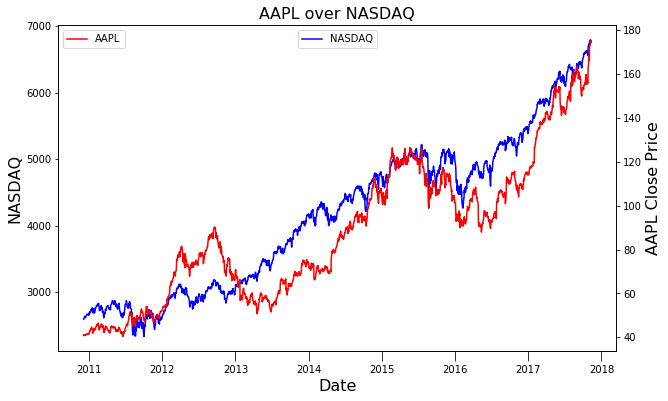

In [24]:
#Cell may need to be re-run for plot to show!


import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

df["Date"] = pd.to_datetime(df["Date"], format = '%Y-%m-%d')

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("AAPL over NASDAQ", fontsize=16)
ax1 = sns.lineplot(x="Date", y="NASDAQ", data=df, color="blue", label="NASDAQ")
ax1.set_ylabel("NASDAQ", fontsize=16)
ax1.set_xlabel("Date", fontsize=16)
plt.legend(loc='upper center')

ax2 = ax1.twinx()
ax2 = sns.lineplot(x="Date", y="AAPL Close Price", data=df, color='red', label="AAPL")
ax2.set_ylabel("AAPL Close Price", fontsize=16)

ax1.tick_params(axis = 'x', which = 'major', length = 10)

plt.legend(loc='best')
plt.show()

*This graph shows that the NASDAQ and AAPL grow and decay at similar relative rates over time*

**Exploring the relative change in Apple's stock price over the relative changes in Fed Rates**

Note: Percent change in interest rates has been scaled down by a factor of 5 to make it's fluctuations easily comparable to the percent change in AAPL.

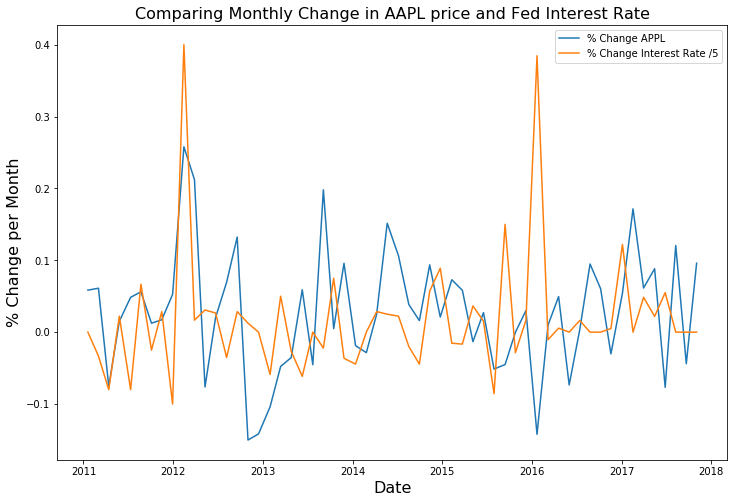

In [16]:
plt.subplots(figsize=(12,8))
graph1 = sns.lineplot(x="Date", y = df["AAPL Close Price"][::30].pct_change(), data=df, Label="% Change APPL")
graph2 = sns.lineplot(x="Date", y = df["Interest Rate"][::30].pct_change()/5, data=df, Label="% Change Interest Rate /5")
graph1.set_title("Comparing Monthly Change in AAPL price and Fed Interest Rate", fontsize=16)
graph1.set_ylabel("% Change per Month", fontsize=16)
graph1.set_xlabel("Date", fontsize=16)
plt.legend(loc='best')

*As we had lots of data points, we chose to compare the monthly change in AAPL with the Fed rates and it is suprisingly correlated (other than the spike in 2016).*

**Exploring Weekly Percent Change in AAPL price against Weekly Percent Change in NASDAQ**

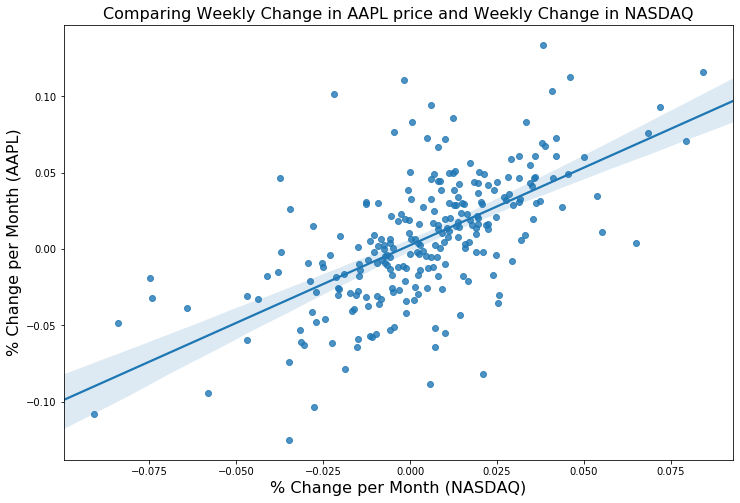

In [17]:
import numpy as np
from scipy import stats

plt.subplots(figsize=(12,8))
plot = sns.regplot(x=df["NASDAQ"][::7].pct_change(), y=df["AAPL Close Price"][::7].pct_change(), data=df)
plot.set_title("Comparing Weekly Change in AAPL price and Weekly Change in NASDAQ", fontsize=16)
plot.set_ylabel("% Change per Month (AAPL)", fontsize=16)
plot.set_xlabel("% Change per Month (NASDAQ)", fontsize=16)
plt.show()

*This graph shows that the weekly change in AAPL versus the NASDAQ has a moderate correlation, indicating that one feature affects another*

### 3.3. Model Construction

In [18]:
# creates a dictionary of all the estimators
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

estimators = {'Multiple Linear Regression': LinearRegression(), 'Ridge': Ridge(), 'Lasso': Lasso(), 
              'Support Vector Machine': SVR(max_iter=1000000)}

In [19]:
from sklearn.model_selection import train_test_split

def classifiers_percentage_split(X_train_selected, X_test_selected, y_train, y_test):
    for i in estimators:
        estimators[i].fit(X=X_train_selected, y = y_train)
        r2 = estimators[i].score(X_test_selected,y_test)
        r2_train = estimators[i].score(X_train_selected,y_train)
        print("\t" + i+":")
        print("\t\t" + "R2 on the train data: ", r2_train,  "\n" + "\t\t"+"R2 on the test data: ", r2)

In [20]:
print("RESULTS:")
classifiers_percentage_split(X_train_selected, X_test_selected, y_train, y_test)

RESULTS:
	Multiple Linear Regression:
		R2 on the train data:  0.9242281331626904 
		R2 on the test data:  0.9226664306849264
	Ridge:
		R2 on the train data:  0.9242216360347373 
		R2 on the test data:  0.9227152305374344
	Lasso:
		R2 on the train data:  0.9066879964858012 
		R2 on the test data:  0.9111649083698861
	Support Vector Machine:
		R2 on the train data:  0.6327810667182933 
		R2 on the test data:  0.6213257551424368


Above, we test our hypothesis of identifying whether or not there is a correlation. We set a benchmark of 0.8 for the correlation metric (R-squared). The other null hypothesis that SVM have the best accuracy was also tested here and clearly was proven to be false.

### 3.4. Model Evaluation

**Best Model Performance**

The Ridge Regression algorithm produced the most prediction accuracy for the testing data. The R-squared value of 0.92271 indicates a very high goodness-of-fit. The Multiple Linear Regression (MLR) model also produced a very high testing accuracy with an R-squared value just below that of Ridge. MLR had a testing R-squared of 0.92266 which also indicates a good fit for the dataset.

**Worst Model Performance**

The Support Vector Machine (SVM) algorithm produced the worst prediction accuracy for the testing data. It's R-squared value for the test set was 0.62132. Although this R-squared value is relatively low, objectively, this model also fits the data well. The Lasso model also was lower than Ridge and MLR, but it still performed well with an R-sqaured of 0.91116.

**Overall Performance**

All four estimators (MLR, Ridge, Lasso, and SVM) performed well (R-square > 0.6) on the data. Additionally, the difference between the accuracy metric for the training versus the testing data was  roughly 1% or less for all estimators indicating that none of the models were overfitted or underfitted. The fit of these models can be attributed to the selection of features from section 3.1 above.

**Hypotheses**

- **Project Hypothesis**
    - H0: The closing price of AAPL and macroeconomic data have no relationship.
    - H1: The closing price of AAPL and macroeconomic data have a relationship.
    - **Evaluation**
    When we created our hypotheses, we assumed that AAPL's price had no correlation to macroeconomic data. Prior to running the selected algorithms, however, we knew that the closing price of AAPL and macroeconomic data have some sort of correlation. This is evidenced by the three graphs in section 3.2. As the NASDAQ grew, for example, so did AAPL's price. An additional correlation with Intetest Rates was identified by the second graph. After running the regression algorithms, we quickly determined that the relationship between our features and target must be strong, as the first three linear models (MLR, Ridge, and Lasso) all had an impressive accuracy as evidenced by R-squared values which were between 0.9 and 1. Based on this metric, we have rejected the null hypothesis. There is evidence of a relationship between the closing price of AAPL and macroeconomic data.
    
   
- **Tests Hypothesis**
    - H0: Support Vector Regression will have the highest prediction accuracy.
    - H1: Support Vector Regression will not have the highest prediction accuracy.
    - **Evaluation**
    Based on research, we had believed that Support Vector Machines (SVM) would have the best predictiveness. This was based on the infographic from sklearn - https://scikit-learn.org/stable/tutorial/machine_learning_map/.
    Also, we thought SVM were widely accepted to be the best linear regression model, however we saw better accuracy with the other three main linear models. In fact, Support Vector Regression provided the least accurate results, hence we have rejected the null hypothesis. We have found evidence that Support Vector Regression does not have the highest predictive accuracy.

### 3.5. Model Optimization

In [21]:
param_grid_ridge = {'alpha':[.001, .01, .1, 1, 10, 100]}
param_grid_mlr = {'normalize':[True, False]}

In [22]:
from sklearn.model_selection import GridSearchCV
print("Model Optimization for our features\n____________________________________\n")
alpha_dict = {}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_mlr = GridSearchCV(LinearRegression(), param_grid_mlr, cv=5)
grid_search_lasso = GridSearchCV(Lasso(), param_grid_ridge, cv=5)
#fit the grid search object on the training data (CV will be performed on this)
grid_search_ridge.fit(X=X_train_selected, y=y_train)
grid_search_mlr.fit(X=X_train_selected, y=y_train)
grid_search_lasso.fit(X=X_train_selected, y=y_train)

#this is the best performance during training
print("Ridge")
print("\tBest cross-validation score: ", grid_search_ridge.best_score_)
#result of grid search
print("\tBest parameters: ", grid_search_ridge.best_params_, "\n")
alpha_dict["Ridge"] = grid_search_ridge.best_params_

print("Multiple Linear Regression")
print("\tBest cross-validation score: ", grid_search_mlr.best_score_)
#result of grid search
print("\tBest parameters: ", grid_search_mlr.best_params_, "\n")
alpha_dict["Multiple Linear Regression"] = grid_search_mlr.best_params_

print("Lasso")
print("\tBest cross-validation score: ", grid_search_lasso.best_score_)
#result of grid search
print("\tBest parameters: ", grid_search_lasso.best_params_)
alpha_dict["Lasso"] = grid_search_lasso.best_params_

Model Optimization for our features
____________________________________

Ridge
	Best cross-validation score:  0.9230926238264174
	Best parameters:  {'alpha': 0.1} 

Multiple Linear Regression
	Best cross-validation score:  0.9230924119120779
	Best parameters:  {'normalize': False} 

Lasso
	Best cross-validation score:  0.9230923731994073
	Best parameters:  {'alpha': 0.001}


The reason we performed hyperparameter tuning was to ensure that we were not overfitting the model. Ideally, the hyperparameter tuning would give us better accuracy, but in our case, it appeared that the tuning decreased the accuracy by roughly 2%. We are fine with this, as we believe our data was overfitting since the NASDAQ and AAPL price empirically relate to each other in the real world.

### 3.6. Model Testing

In [23]:
tested_estimators = {
    'Multiple Linear Regression': LinearRegression(), 
    'Ridge': Ridge(), 'Lasso': Lasso()}

print("Testing with Tuned Algorithms\n____________________\n")

for name, method in tested_estimators.items():
    if(name == 'Ridge'):
        alpha = alpha_dict.get('Ridge').get('alpha')
        print(name, "(with tuned alpha of:", str(alpha) + "):")
        model = method.set_params(alpha=alpha).fit(X=X_train_selected, y=y_train)
    if(name == 'Lasso'):
        alpha = alpha_dict.get('Lasso').get('alpha')
        print(name, "(with tuned alpha of:", str(alpha) + "):")
        model = method.set_params(alpha=alpha).fit(X=X_train_selected, y=y_train)
        
    elif(name == "Multiple Linear Regression"): 
         print(name,':')
         model = method.fit(X=X_train_selected, y=y_train)
    
    print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
    print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)),'\n')

Testing with Tuned Algorithms
____________________

Multiple Linear Regression :
	R-squared value for training set:  0.9242281331626904
	R-squared value for testing set:  0.9226664306849264 

Ridge (with tuned alpha of: 0.1):
	R-squared value for training set:  0.9242280662437747
	R-squared value for testing set:  0.9226718994091669 

Lasso (with tuned alpha of: 0.001):
	R-squared value for training set:  0.9242281055833448
	R-squared value for testing set:  0.9226684862200906 



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

### Analysis

**Summary**

Our analysis included separating our data into various feature variables, which were various economic indicators 
as well as stock market statistics, and our target variable the closing price of APPL. We created a DataFrame 
that contained all the features and the target variables for training and testing. Then, we analyzed and 
visualized the relationships between the features and the target variables. This helped us visually interpret 
the relationship of certain economic indicators and financial statistics in regard to the closing price of APPL. 
While running the regression models, for the supervised machine learning task, we implemented four regression 
models: Multiple Linear Regression, Ridge, Lasso and Support Vector Machine. After implementing each 
of the models, we identified the best performing models and optimized the models. We used Grid Search to 
find the best performing alpha for each of the regression algorithms.  This allows it so that we are not 
overfitting the data. We then concluded the analysis by testing the tuned algorithm resulting in a high 
predictive accuracy of around 0.92. 

### Interpretation

**Algorithms used:**
- Multiple Linear Regression
- Ridge
- Lasso
- Support Vector Machine (Regression)

In order to determine which algorithm to use to predict the close price of Apple's stock, we followed these steps:

1. Scaled the data
2. Selected the most relevant and correlated features
3. Applied each estimator to the training set and tested the model with the testing set
4. Tested different alpha parameters for Ridge() and T/F normalization on the MLR model
5. Retested each algorithm with the new parameters

**Results**

After completing the above steps, the Ridge regression with an alpha level of 0.1 had the best accuracy based off of its R-squared value of 0.92267. However, Multiple Linear Regression and Lasso both had testing accuracy within 0.001% which makes sense, as they are simply variations of the linear regression. We have decided that we should use Ridge Regression as the algorithm to predict the close price of Apple's stock (AAPL).

We are confident that we can predict the close stock price of AAPL by using the features of NASDAQ Composite, Real GDP, Unemployment Rate, and Consumer Price Index. However, realistically, in order to be confident that we'd make money the accuracy rate would need to be a little higher. In the stock market, being 8% off a price target (100-92%) is a significant difference which can lose an investor money. However, we could just as easily be 8% lower on a price target and make money with the same probability of losing money.

**Evaluating Hypotheses**

    - H0: The closing price of AAPL and macroeconomic data have no relationship.
    - H1: The closing price of AAPL and macroeconomic data have a relationship.
    - We have rejected the null hypothesis. There is evidence of a relationship between the closing price of AAPL and macroeconomic data.
    
    - H0: Support Vector Regression will have the highest prediction accuracy.
    - H1: Support Vector Regression will not have the highest prediction accuracy.
    - We have rejected the null hypothesis. We have found evidence that Support Vector Regression does not have the highest predictive accuracy.
    
   
*In-depth explainations for each hypothesis and reasoning for rejecting each can be found in 3.4 above*

### Future Work

There are several things that we can do to make this project better and more useful in the future. Considering that there are many quantitative finance libraries such as quantlib or quantpy which we could use to get and perform operations with different financial data, and also facilitate backtesting allowing us to test our model against historical stocks in a more tried and true and thorough way. Lastly it would also be worthwhile to look at different economic indicators as well, such as the price of crude oil, alternatively FRED also has many variations of the indicators that we have such as the consumer price index for all urban consumers in the united states. Upon finishing this project we have many more avenues to pursue.

### Conclusion

To conclude, using the economic indicators that we received from FRED and the stock indexes, we split our main dataset into training and testing sets, scaled the features using MinMaxScalar and used the RFE feature selection algorithm to select the most suitable features to use for our model. We then tested out model using ou r chosen regression algorithms. We then optimized our model and tested again. We ended up with a reasonably accurate score with Multiple linear regression, Ridge regression, and Lasso regression. It is worth noting however that these results may be skewed because the AAPL stock is part of the NASDAQ composite, this definitely contributes to the accuracy being high.

Through our analysis above we have been successful in exploring how economic indicators affect the stock price of the AAPL stock.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.

Gary Shetye:
- I brought the data from FRED and Kaggle into one dataframe early on in the project (Data Acquisition). Hence, I wrote section 2.1. Since I was very familiar with the data, I also wrote up section 2.2 (Data Analysis) on what the data means and how it is structured, as well as the hypotheses. I then created the three data visualizations for section 3.2. After Harris and Mahin did hyperparameter tuning, I added normalization/not normalization to the hyperparamter tuning. For the discussion section (Section 4), I wrote up the interpretation of the results. I also formatted the final notebook.

Harris Lussenhop:
- I completed the data analysis part of section 2 (section 2.3), I completed the Data Wrangling part of Section 3 (Section 3.1) I also completed the future work and conclusion paragraphs in section 4. I also contributed to the work done in the Model Construction, Model Evaluation, and Model testing parts of section 3 (sections 3.3, 3.5, and 3.6).

Mahin Master:
-  I completed the introduction (Section 1) and model evaluation (Section 3.4). Harris and I both completed the model optimization together (Section 3.5). Harris and I worked primarily on hyper-tuning the model. I also wrote the analysis for the report including the executive summary and conclusion.